# What Am I Doing Here?
This is an attempt to automate the process of cleaning, resampling, and visualizing data my colleague SH needs to do periodically. It is currently done in Excel with pivot tables, and this is sufficient, but I am doing this as an exercise than a useful tool.

This is the Python version of the script, which I am writing first to get an idea of the logic I want before I try to replicate the functionality in R as a learning process.

In [48]:
import os
import datetime
import pandas as pd
import matplotlib as plt

In [70]:
books = pd.read_csv(r'C:\Users\agreenman\Documents\data\SH-raw-data.csv')

#books.info()
#print(books.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   RECORD #          77 non-null     object
 1   Publication Date  77 non-null     object
 2   TITLE             77 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB
    RECORD # Publication Date  \
0  b87742792             1958   

                                               TITLE  
0  The almanac of the canning, freezing, preservi...  


I don't *need* to keep it as a df; as far as I know, as the title and record number are irrelevant to the task. What I need at the end is two columns, timespan and count.

In [78]:
years_list = books['Publication Date'].tolist()

years_list = [year for year in years_list if year.isdigit()] # the original data has an error in the Publication Date value in row 77 which I neglected to remove in the xlsx I received.

I could probably do the following in less lines by using a list comprehension for each condition and then doing len(list) for the total, but an if statement came to mind faster.

In [74]:
old_books = 0
middle_books = 0
new_books = 0

for year in years_list:
    if int(year) <= 1999:
        old_books += 1
    elif 2000 <= int(year) < 2010:
        middle_books += 1
    elif int(year) >= 2010:
        new_books += 1
        
#print(old_books, middle_books, new_books)

grouped = [("1900s", old_books), ("2000s", middle_books), ("2010s+", new_books)]

#print(grouped)

I represented this as a list of tuples instead of a dict to keep it ordered, because dict-to-df causes indexing headaches. I probably could have kept it as a df, but I wasn't sure how to resample by a value in a column.

I can now turn it back into a df to help with visualizing it, and any math I want to do:

In [73]:
grouped_df = pd.DataFrame(grouped, columns=['Time Period', 'Count'])

print(grouped_df)

  Time Period  Count
0       1900s     15
1       2000s     45
2      2010s+     16


Now that I have the df I wanted, I can visualize it.

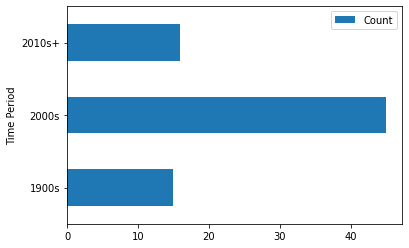

In [77]:
books_plot = grouped_df.plot(kind='barh', x='Time Period', y='Count')